In [27]:
import numpy as np
import pandas as pd
import gurobipy as gp
from IPython.display import display, Markdown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [28]:
#Q1 
#Reading in the CSV file with the Return on Investment Data and checking the data in it.
ROI = pd.read_csv('./ROI_data.csv')
ROI.head()

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [29]:
#Creating a dictionary with all the available channels so as to print results correctly at a later stage
channel = list(ROI.columns)[1:]
channel_idx = {}
for idx, char in enumerate(channel):
    channel_idx[char] = idx
channel_idx

{'Print': 0,
 'TV': 1,
 'SEO': 2,
 'AdWords': 3,
 'Facebook': 4,
 'LinkedIn': 5,
 'Instagram': 6,
 'Snapchat': 7,
 'Twitter': 8,
 'Email': 9}

In [30]:
#Q2 and #Q3
# Defining the objective vector
obj1 = np.array(ROI.iloc[0][1:])

# initializing & defining the constraint matrix
#We have 13 total constraints across 10 variables
A = np.zeros((13,10))
#Constraint 1- The amount invested in print and TV should be no more than the amount spent on Facebook and Email.
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]
#Constraint 2- The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter) should be at least twice of SEO and AdWords.
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]
#Constraint 3 - Total amount invested across all channels should be less than $10 million
A[2,:]=[1,1,1,1,1,1,1,1,1,1]
#Constraints 4 to 13 - For each platform, the amount invested should be no more than $3M
A[3,:] = [1,0,0,0,0,0,0,0,0,0]
A[4,:] = [0,1,0,0,0,0,0,0,0,0]
A[5,:] = [0,0,1,0,0,0,0,0,0,0]
A[6,:] = [0,0,0,1,0,0,0,0,0,0]
A[7,:] = [0,0,0,0,1,0,0,0,0,0]
A[8,:] = [0,0,0,0,0,1,0,0,0,0]
A[9,:] = [0,0,0,0,0,0,1,0,0,0]
A[10,:] = [0,0,0,0,0,0,0,1,0,0]
A[11,:] = [0,0,0,0,0,0,0,0,1,0]
A[12,:] = [0,0,0,0,0,0,0,0,0,1]
print(A)

[[ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0.  2.  2. -1. -1. -1. -1. -1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [31]:
#Defining the constraint bounds
b = np.array([0,0,10,3,3,3,3,3,3,3,3,3,3])
# all constraints are less than or equal constraints
sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) 


In [32]:
#Running the model to find the optimal allocation
trainMod = gp.Model()

Trainx = trainMod.addMVar(len(obj1)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
TrainModCon = trainMod.addMConstrs(A, Trainx, sense, b) # add the constraints to the model
trainMod.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
trainMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
trainMod.optimize()

In [33]:
#Finding the profit from our model given the constraints and other conditions
trainMod.objVal

0.45600000000000007

In [34]:
#Finding the optimal allocation given the set of ROI's
print('The optimal revenue we can gain is {:.2f} million'.format(trainMod.objVal))

budget_roi = list(Trainx.x)
budget_dict = {}
for chn, num in zip(channel, budget_roi):
    budget_dict[chn] = num

pd.Series(budget_dict)
Trainx.x

The optimal revenue we can gain is 0.46 million


Print        0.0
TV           3.0
SEO          0.0
AdWords      1.0
Facebook     0.0
LinkedIn     0.0
Instagram    3.0
Snapchat     0.0
Twitter      0.0
Email        3.0
dtype: float64

array([0., 3., 0., 1., 0., 0., 3., 0., 0., 3.])

In [35]:
#Q4
# objective vector
obj2 = np.array(ROI.iloc[1][1:])

# initializing & defining the constraint matrix
#We have 13 total constraints across 10 variables
A = np.zeros((13,10))
#Constraint 1- The amount invested in print and TV should be no more than the amount spent on Facebook and Email.
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]
#Constraint 2- The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter) should be at least twice of SEO and AdWords.
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]
#Constraint 3 - Total amount invested across all channels should be less than $10 million
A[2,:]=[1,1,1,1,1,1,1,1,1,1]
#Constraints 4 to 13 - For each platform, the amount invested should be no more than $3M
A[3,:] = [1,0,0,0,0,0,0,0,0,0]
A[4,:] = [0,1,0,0,0,0,0,0,0,0]
A[5,:] = [0,0,1,0,0,0,0,0,0,0]
A[6,:] = [0,0,0,1,0,0,0,0,0,0]
A[7,:] = [0,0,0,0,1,0,0,0,0,0]
A[8,:] = [0,0,0,0,0,1,0,0,0,0]
A[9,:] = [0,0,0,0,0,0,1,0,0,0]
A[10,:] = [0,0,0,0,0,0,0,1,0,0]
A[11,:] = [0,0,0,0,0,0,0,0,1,0]
A[12,:] = [0,0,0,0,0,0,0,0,0,1]
print(A)

[[ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0.  2.  2. -1. -1. -1. -1. -1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [36]:
#Defining the constraint bounds
b = np.array([0,0,10,3,3,3,3,3,3,3,3,3,3])
# all constraints are less than or equal constraints
sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) 



In [37]:
#Running the model to find the optimal allocation
trainMod2 = gp.Model()

Trainx2 = trainMod2.addMVar(len(obj2)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
TrainMod2Con = trainMod2.addMConstrs(A, Trainx2, sense, b) # add the constraints to the model
trainMod2.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
trainMod2.Params.OutputFlag = 0 # tell gurobi to shut up!!
trainMod2.optimize()

In [38]:
#Finding the profit from our model given the constraints and other conditions
trainMod2.objVal

0.45600000000000007

In [39]:
#Finding the optimal allocation given the set of ROI's
print('The optimal revenue we can gain is {:.2f} million'.format(trainMod.objVal))

budget_roi2 = list(Trainx2.x)
budget_dict = {}
for chn, num in zip(channel, budget_roi2):
    budget_dict[chn] = num

pd.Series(budget_dict)

The optimal revenue we can gain is 0.46 million


Print        3.0
TV           0.0
SEO          0.0
AdWords      1.0
Facebook     3.0
LinkedIn     3.0
Instagram    0.0
Snapchat     0.0
Twitter      0.0
Email        0.0
dtype: float64

In [41]:
# Create dataframe to compare allocations and make graph coding simpler
import seaborn as sns
first_allocations = pd.Series(Trainx.x, name = 'Allocations')
second_allocations = pd.Series(Trainx2.x, name = 'Allocations')
allocations = pd.concat([first_allocations,second_allocations])
mediums = pd.Series(ROI.columns[1:], name = 'Marketing Mediums')
mediums1 = pd.Series(ROI.columns[1:], name = 'Marketing Mediums')
mediums = pd.concat([mediums, mediums1])
s1 = pd.Series(['Roi 1', 'Roi 1','Roi 1','Roi 1','Roi 1','Roi 1','Roi 1','Roi 1','Roi 1','Roi 1'], name = 'ROI')
s2 = pd.Series(['Roi 2','Roi 2','Roi 2','Roi 2','Roi 2','Roi 2','Roi 2','Roi 2','Roi 2','Roi 2'], name = 'ROI')
roi = pd.concat([s1, s2])
df = pd.concat([mediums, allocations, roi], axis=1)
df

,Marketing Mediums,Allocations,ROI
0,Print,0.0,Roi 1
1,TV,3.0,Roi 1
2,SEO,0.0,Roi 1
3,AdWords,1.0,Roi 1
4,Facebook,0.0,Roi 1
5,LinkedIn,0.0,Roi 1
6,Instagram,3.0,Roi 1
7,Snapchat,0.0,Roi 1
8,Twitter,0.0,Roi 1
9,Email,3.0,Roi 1


C:\Users\Yash W\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


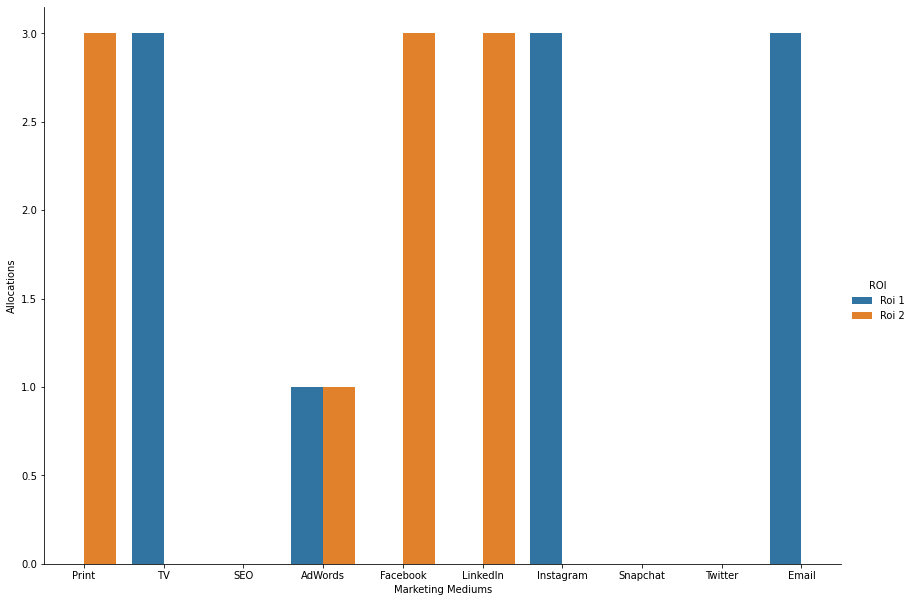

In [42]:
# Plot comparing allocations for each set of ROIs
figure = sns.factorplot(x = 'Marketing Mediums', y='Allocations', 
               hue = 'ROI',data=df, kind='bar', height=8.27, aspect=11.7/8.27)

Text(0.5, 1.0, 'Changes in Allocation Amounts')

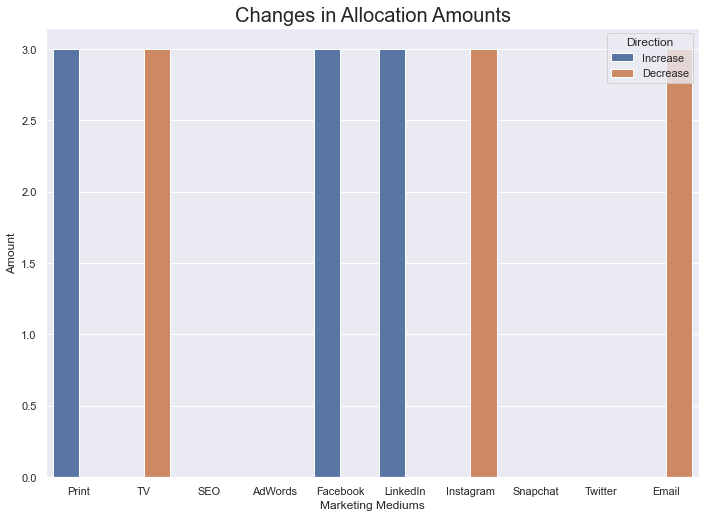

In [43]:
# Different plot example shows overall change in allocation amount and direction of the change
s1 = pd.Series(['Increase', 'Decrease','Increase','Increase','Increase','Increase','Decrease','Increase','Increase','Decrease'], name = 'Direction')
mediums = pd.Series(ROI.columns[1:], name = 'Marketing Mediums')
amount = pd.Series([3,3,0,0,3,3,3,0,0,3], name = 'Amount')
df1 = pd.concat([s1, mediums, amount], axis=1)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Marketing Mediums", y="Amount", hue = 'Direction' ,data=df1)
ax.set_title('Changes in Allocation Amounts', size = 20)

In [48]:
#Q5
#Finding difference between optimal objective and objective used on second allocation
trainMod.objVal - obj1 @ Trainx2.x

0.20400000000000007

In [49]:
#Finding difference between second allocation objective and objective used on original allocation
trainMod2.objVal - obj2 @ Trainx.x

0.19200000000000006

In [50]:
#Q5 (Cont.)- Checking the relevance of Constraint 3 
#Remove constraint 3 and rerun the model with ROI 1
obj3 = np.array(ROI.iloc[0][1:])

# initialize & define constraint matrix
A = np.zeros((3,10))
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]
A[2,:]=[1,1,1,1,1,1,1,1,1,1]

# limits


b = np.array([0,0,10])
# all constraints are less than or equal constraints
sense = np.array(['<','<','<']) 

trainMod3 = gp.Model()

Trainx3 = trainMod3.addMVar(len(obj3)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
TrainModCon = trainMod3.addMConstrs(A, Trainx, sense, b) # add the constraints to the model
trainMod3.setMObjective(None,obj3,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

trainMod3.Params.OutputFlag = 0 # tell gurobi to shut up!!
trainMod3.optimize()


In [51]:
print('The optimal revenue we can gain is {:.2f} million'.format(trainMod.objVal))

budget_roi2 = list(Trainx3.x)
budget_dict = {}
for chn, num in zip(channel, budget_roi2):
    budget_dict[chn] = num

pd.Series(budget_dict)

The optimal revenue we can gain is 0.46 million


Print        0.0
TV           5.0
SEO          0.0
AdWords      0.0
Facebook     0.0
LinkedIn     0.0
Instagram    0.0
Snapchat     0.0
Twitter      0.0
Email        5.0
dtype: float64

In [52]:
#Remove constraint 3 and rerun the model with ROI 2
obj4 = np.array(ROI.iloc[1][1:])

# initialize & define constraint matrix
A = np.zeros((3,10))
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]
A[2,:]=[1,1,1,1,1,1,1,1,1,1]

# limits

b = np.array([0,0,10])
# all constraints are less than or equal constraints
sense = np.array(['<','<','<']) 

trainMod4 = gp.Model()

Trainx4 = trainMod4.addMVar(len(obj4)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
TrainMod4on = trainMod4.addMConstrs(A, Trainx4, sense, b) # add the constraints to the model
trainMod4.setMObjective(None,obj4,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

trainMod4.Params.OutputFlag = 0 # tell gurobi to shut up!!
trainMod4.optimize()

In [53]:
print('The optimal revenue we can gain is {:.2f} million'.format(trainMod2.objVal))

budget_roi2 = list(Trainx4.x)
budget_dict = {}
for chn, num in zip(channel, budget_roi2):
    budget_dict[chn] = num

pd.Series(budget_dict)

The optimal revenue we can gain is 0.46 million


Print        5.0
TV           0.0
SEO          0.0
AdWords      0.0
Facebook     5.0
LinkedIn     0.0
Instagram    0.0
Snapchat     0.0
Twitter      0.0
Email        0.0
dtype: float64

### As seen here, the Third Constraint is required since it encourages portfolio diversity. Otherwise, the model simply chooses the channels with the highest ROI's and splits the money amongst them, exposing us to more risks in case of a change in advertising prices or other market conditions.

In [54]:
#Q6 
#Creating a function to run our model and provide an optimized solution given an objective function
#def Solver(obj1):
#'''This function accepts the input parameters and return the optimized solution'''

obj1 = np.array(ROI.iloc[0][1:])

# initialize & define constraint matrix
A = np.zeros((13,10))
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]
A[2,:]=[1,1,1,1,1,1,1,1,1,1]
A[3,:] = [1,0,0,0,0,0,0,0,0,0]
A[4,:] = [0,1,0,0,0,0,0,0,0,0]
A[5,:] = [0,0,1,0,0,0,0,0,0,0]
A[6,:] = [0,0,0,1,0,0,0,0,0,0]
A[7,:] = [0,0,0,0,1,0,0,0,0,0]
A[8,:] = [0,0,0,0,0,1,0,0,0,0]
A[9,:] = [0,0,0,0,0,0,1,0,0,0]
A[10,:] = [0,0,0,0,0,0,0,1,0,0]
A[11,:] = [0,0,0,0,0,0,0,0,1,0]
A[12,:] = [0,0,0,0,0,0,0,0,0,1]
# limits


#print(A)

b = np.array([0,0,10,3,3,3,3,3,3,3,3,3,3])
# all constraints are less than or equal constraints
sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) 


trainMod = gp.Model()

Trainx = trainMod.addMVar(len(obj1)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
TrainModCon = trainMod.addMConstrs(A, Trainx, sense, b) # add the constraints to the model
trainMod.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
trainMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
trainMod.optimize()

#Finding lower bounds for our ROI changes
print(Trainx.SAObjLow)
#Finding upper bounds for our ROI changes
print(Trainx.SAObjUp)



[ -inf 0.039  -inf 0.033  -inf  -inf 0.039  -inf  -inf 0.029]
[0.049 0.062 0.039 0.046 0.029 0.039   inf 0.039 0.039   inf]


In [55]:
sensitivity_df  = pd.DataFrame({
    'Channel':channel,
    'ChangeDown':Trainx.SAObjLow,
    'ChangeUp':Trainx.SAObjUp
})
sensitivity_df

,Channel,ChangeDown,ChangeUp
0,Print,-inf,0.049
1,TV,0.039,0.062
2,SEO,-inf,0.039
3,AdWords,0.033,0.046
4,Facebook,-inf,0.029
5,LinkedIn,-inf,0.039
6,Instagram,0.039,inf
7,Snapchat,-inf,0.039
8,Twitter,-inf,0.039
9,Email,0.029,inf


array([0.049, 0.062, 0.039, 0.046, 0.029, 0.039, 0.039, 0.039])

<BarContainer object of 8 artists>

Text(0.5, 0.98, 'ROI Increase Thresholds')

Text(0, 0.5, 'Increase Threshold')

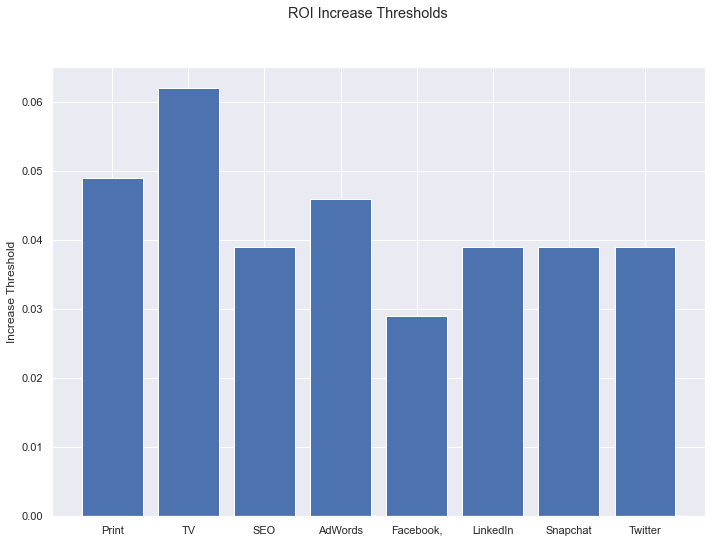

In [56]:
#Plotting the increase thresholds
import matplotlib.pyplot as plt

ups = np.array(sensitivity_df['ChangeUp'][0:])
ups = np.delete(ups, 6)
ups = np.delete(ups, 8)
ups
up_channels = ['Print','TV','SEO','AdWords','Facebook,','LinkedIn','Snapchat','Twitter']

plt.bar(up_channels,ups)
plt.suptitle('ROI Increase Thresholds')
plt.ylabel('Increase Threshold')
plt.show()


<BarContainer object of 4 artists>

Text(0.5, 0.98, 'ROI Decrease Thresholds')

Text(0, 0.5, 'Decrease Threshold')

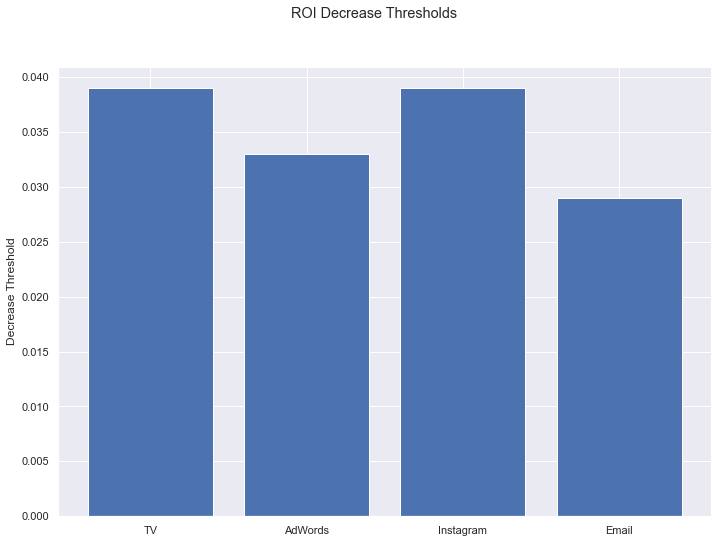

In [57]:
#Plotting the decrease thresholds
downs = np.array(sensitivity_df['ChangeDown'][1:])
downs = np.delete(downs, [1,3,4,6,7])
down_channels = ['TV','AdWords','Instagram','Email']
plt.bar(down_channels,downs)
plt.suptitle('ROI Decrease Thresholds')
plt.ylabel('Decrease Threshold')
plt.show()

In [58]:
#Q7
def optimization_function_month(roi_matrix, budget):
    obj = roi_matrix # objective vector
    A = np.zeros((13,10)) # initialize constraint matrix



    ############ Defining Constraints
    channel_level_cons = np.identity(10)
    overall_budget_cons = np.ones((1,10))
    A[11,[0,1]] = 1
    A[11,[4,9]] = -1
    A[12,4:9] = 1
    A[12,2:4] = -2
    A[0:10,] = channel_level_cons
    A[10] = overall_budget_cons
    ##################################



    #### Output Part of the constraint####
    b = np.array([3,3,3,3,3,3,3,3,3,3,budget,0,0])
    sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','>'])



    ojModel = gp.Model() # initialize an empty model



    ojModX = ojModel.addMVar(10) # tell the model how many variables there are
    # must define the variables before adding constraints because variables go into the constraints
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
    ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model


    ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!



    ojModel.optimize() # solve the LP

    objective_value = ojModel.objVal
    budget_allocation = ojModX.x

    return objective_value, budget_allocation

In [59]:
#Reading in the matrix of the ROI values
monthly_roi = pd.read_csv("roi_mat.csv")
#Dropping the month names and adding an index number instead
monthly_roi_clean = monthly_roi.drop(monthly_roi.columns[0], axis = 1)
monthly_roi_clean.head()

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9


In [60]:
#Creating a list of columns to use for later visualizations/presentation
promotions_list= list(monthly_roi_clean.columns)


In [61]:
#Using this code to delete/ignore the pesky warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
#Setting initial budgets, allocations and creating an iterative variable for the month with two empty lists for adwords and twitter returns(since these show change in allocation)
budget = 10
previous_allocation = np.zeros(10)
month_iter = 0
ad_ally = []
tw_ally = []
#Iterating over the months
for x in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
    #Picking the relevant ROI from our matrix using the month iter
    roi_month = np.array(monthly_roi_clean.loc[month_iter,:])/100
    #Finding the forecasted profit and allocation based on the forecast ROI by running our defined function
    forecasted_profit, budget_allocation_based_on_forecast_ROI = optimization_function_month(obj1,budget)
    #Printing the output(total available budget)
    print("Month: {}".format(x))
    #print("\nProfit for month {} is {:.2f}".format(x,profit))
    print("\nTotal Budget = {:.2f}".format(budget))


    #Presenting the output in a dataframe format, with columns being the same as the promotions list
    roi_month_df = pd.DataFrame([], columns = promotions_list)
    #Printing the monthly ROI 
    roi_month_df.loc['Monthly ROI',:] = roi_month
    #Printing the budget allocation based on forecast ROI    
    roi_month_df.loc['Budget Allocation',:] = np.round(budget_allocation_based_on_forecast_ROI,2)
    #Printing the change in budget allocation based on forecast ROI by finding difference with previous allocation
    roi_month_df.loc['Delta Budget Allocation',:] = np.round(budget_allocation_based_on_forecast_ROI - previous_allocation,2)
    #Finding the profit based on the actual ROI obtained for each month
    roi_month_df.loc['Profit on Actual ROI',:] = np.round(budget_allocation_based_on_forecast_ROI,2)*roi_month
    #Appending budget alloctions for Adwords and Twitter to their list for later use in visualization
    ad_ally.append(roi_month_df['AdWords']['Budget Allocation'])
    tw_ally.append(roi_month_df['Twitter']['Budget Allocation'])
    #Calculating the monthly profit
    profit_monthly = np.sum(np.round(budget_allocation_based_on_forecast_ROI,2)*roi_month)
    roi_month_df.head()
    #Previous allocation is reset using new previous month
    previous_allocation = budget_allocation_based_on_forecast_ROI
    #Moving to the next month
    month_iter= month_iter+1
    print('\n')
    #Raising the budget based on the profit obtained
    budget = budget + 0.5*profit_monthly

Month: Jan

Total Budget = 10.00


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.04,0.036,0.024,0.039,0.03,0.035,0.036,0.0225,0.035,0.035
Budget Allocation,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0
Delta Budget Allocation,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0
Profit on Actual ROI,0.0,0.108,0.0,0.039,0.0,0.0,0.108,0.0,0.0,0.105




Month: Feb

Total Budget = 10.18


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.04,0.039,0.027,0.038,0.043,0.032,0.027,0.018,0.037,0.035
Budget Allocation,0.0,3.0,0.0,1.18,0.0,0.0,3.0,0.0,0.0,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.18,0.0,0.0,0.0,0.0,0.0,0.0
Profit on Actual ROI,0.0,0.117,0.0,0.04484,0.0,0.0,0.081,0.0,0.0,0.105




Month: Mar

Total Budget = 10.35


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.035,0.029,0.031,0.038,0.024,0.041,0.037,0.026,0.042,0.025
Budget Allocation,0.0,3.0,0.0,1.35,0.0,0.0,3.0,0.0,0.0,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0
Profit on Actual ROI,0.0,0.087,0.0,0.0513,0.0,0.0,0.111,0.0,0.0,0.075




Month: Apr

Total Budget = 10.52


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.038,0.031,0.024,0.044,0.024,0.038,0.037,0.025,0.036,0.029
Budget Allocation,0.0,3.0,0.0,1.51,0.0,0.0,3.0,0.0,0.01,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.0,0.01,0.0
Profit on Actual ROI,0.0,0.093,0.0,0.06644,0.0,0.0,0.111,0.0,0.00036,0.087




Month: May

Total Budget = 10.69


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.035,0.032,0.019,0.034,0.027,0.027,0.039,0.022,0.045,0.039
Budget Allocation,0.0,3.0,0.0,1.56,0.0,0.0,3.0,0.0,0.13,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.12,0.0
Profit on Actual ROI,0.0,0.096,0.0,0.05304,0.0,0.0,0.117,0.0,0.00585,0.117




Month: Jun

Total Budget = 10.89


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.04,0.032,0.027,0.034,0.034,0.03,0.045,0.021,0.038,0.041
Budget Allocation,0.0,3.0,0.0,1.63,0.0,0.0,3.0,0.0,0.26,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.13,0.0
Profit on Actual ROI,0.0,0.096,0.0,0.05542,0.0,0.0,0.135,0.0,0.00988,0.123




Month: Jul

Total Budget = 11.10


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.039,0.036,0.02,0.044,0.039,0.037,0.043,0.018,0.04,0.038
Budget Allocation,0.0,3.0,0.0,1.7,0.0,0.0,3.0,0.0,0.4,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,0.0
Profit on Actual ROI,0.0,0.108,0.0,0.0748,0.0,0.0,0.129,0.0,0.016,0.114




Month: Aug

Total Budget = 11.32


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.042,0.033,0.028,0.042,0.02,0.037,0.036,0.015,0.044,0.043
Budget Allocation,0.0,3.0,0.0,1.77,0.0,0.0,3.0,0.0,0.55,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.15,0.0
Profit on Actual ROI,0.0,0.099,0.0,0.07434,0.0,0.0,0.108,0.0,0.0242,0.129




Month: Sep

Total Budget = 11.54


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.041,0.028,0.025,0.042,0.029,0.037,0.028,0.025,0.04,0.034
Budget Allocation,0.0,3.0,0.0,1.85,0.0,0.0,3.0,0.0,0.69,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,0.0
Profit on Actual ROI,0.0,0.084,0.0,0.0777,0.0,0.0,0.084,0.0,0.0276,0.102




Month: Oct

Total Budget = 11.72


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.03,0.03,0.031,0.046,0.031,0.033,0.032,0.023,0.025,0.032
Budget Allocation,0.0,3.0,0.0,1.91,0.0,0.0,3.0,0.0,0.82,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.13,0.0
Profit on Actual ROI,0.0,0.09,0.0,0.08786,0.0,0.0,0.096,0.0,0.0205,0.096




Month: Nov

Total Budget = 11.92


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.048,0.033,0.027,0.041,0.029,0.036,0.042,0.03,0.031,0.041
Budget Allocation,0.0,3.0,0.0,1.97,0.0,0.0,3.0,0.0,0.95,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.13,0.0
Profit on Actual ROI,0.0,0.099,0.0,0.08077,0.0,0.0,0.126,0.0,0.02945,0.123




Month: Dec

Total Budget = 12.15


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Monthly ROI,0.048,0.04,0.019,0.037,0.042,0.036,0.026,0.029,0.036,0.037
Budget Allocation,0.0,3.0,0.0,2.05,0.0,0.0,3.0,0.0,1.1,3.0
Delta Budget Allocation,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.15,0.0
Profit on Actual ROI,0.0,0.12,0.0,0.07585,0.0,0.0,0.078,0.0,0.0396,0.111


Text(0.5, 0.98, 'Allocations for AdWords and Twitter')

Text(0, 0.5, 'Allocation in $Millions')

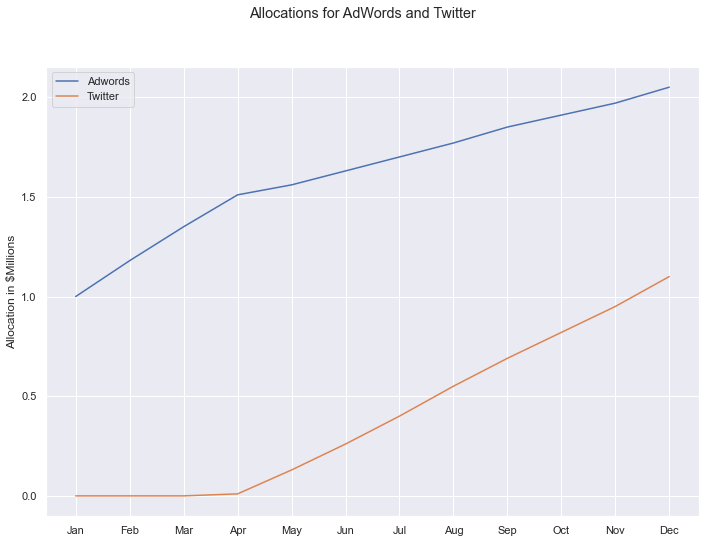

In [62]:
# Plot monthly allocations for the only two marketing mediums that have changing allocations over the year (AdWords & Twitter)
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month, ad_ally, tw_ally)
plt.suptitle('Allocations for AdWords and Twitter')
plt.ylabel('Allocation in $Millions')
plt.legend(['Adwords','Twitter'])
plt.show()

# Q8
As per the information provided, a stable budget is defined as one where monthly allocation such that for each platform the monthly change in spend is no more than $1M. Our budget appears to be extremely robust given this definition, because on reviewing the profits and monthly optimal allocations, we notice the following:

The only budgets that are changing in our model from question 7 are those for AdWords and Twitter, and neither of them ever increase by more than $230,000 on a monthly basis.

Building on the logic in 1, our monthly changes in allocations are also always less than $1 million.

Hence, we can safely say that our budget estimates are stable since there is no mathematical or logical manner in which we can exceed $1 million in allocation changes. 

If the budget was unstable, we would need to add more constraints with respect to allocations and spending limits on specific channels in order to make it stable.
